**Linear Regression**

2. Problem Statement Description
⚫ Objective: To build a linear regression model for the prediction of final year grades of students using the available data.
⚫ Data Description: This data is adapted from the "Student Performance Data Set" available at UCI Machine Learning Repository. This data is of students who pursued a 3-year degree program.
⚫ Each row represents the features (attributes) of a particular student. This is a data of 365 stduents, so the data contains 365 rows.
⚫ There are 5 data features (columns) - student's score in the first year, score in the second year, study time, number of failures throughout,
and the absences recorded. The score in the final year is the target (outcome or response or dependent) variable.
⚫ More information is available here: https://archive.ics.uci.edu/ml/datasets/Student+Performance#

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [3]:
data = pd.read_csv(r"C:\Users\sk11351\Downloads\StudentPerformance_LRData.csv")
data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
0,6,4,4,0,2,3.0
1,19,19,6,0,8,12.0
2,14,15,8,0,5,11.0
3,10,8,4,1,3,6.0
4,7,10,6,1,6,5.0


In [4]:
data.shape

(5000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FirstYrScore   5000 non-null   int64  
 1   SecondYrScore  5000 non-null   int64  
 2   StudyTime      5000 non-null   int64  
 3   Failures       5000 non-null   int64  
 4   Absences       5000 non-null   int64  
 5   FinalYrScore   5000 non-null   float64
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


Missing values
like NAN, NA or NULL Values

In [8]:
data.isnull().any()     

FirstYrScore     False
SecondYrScore    False
StudyTime        False
Failures         False
Absences         False
FinalYrScore     False
dtype: bool

In [9]:
data.isnull().sum()

FirstYrScore     0
SecondYrScore    0
StudyTime        0
Failures         0
Absences         0
FinalYrScore     0
dtype: int64

Handling Missing values

Handling missing values
          Had there been any missing values, one may handle them with one of the following techniques. Note that this is not an exhaustive list. 

A. Deletion: You can simply delete the rows or columns with missing values. However, this approach can result in loss of information in the data.

B. Imputation: You can replace the missing values with some estimated values. There are several methods of imputation, including:
   
    1. Mean/Median/Mode imputation: Replace the missing values with the mean, median or mode of the non-missing values in the same
column.
Example 1: In a dataset of house price prediction, there are missing values for the number of bedrooms in some of the properties. You can replace the missing values with the median number of bedrooms in the non-missing properties.
• Example 2: In a dataset of customer satisfaction ratings, there are missing values for the age of some of the customers. You can replace the missing values with the mode age (most common age) in the non-missing customers.
     
     2. Regression imputation: Predict the missing values using a regression model based on the non-missing values.
• Example 1: In a dataset of predictions of employee salaries, there are missing values for the years of experience of some of the employees. You can use a regression model based on the non-missing values of salary and years of experience to predict the missing values.
• Example 2: In a dataset of prediction of whether medical insurance claims will be raised or not, there are missing values for the amount claimed for some of the patients. You can use a regression model based on the non-missing values of age, gender, and
diagnosis to predict the missing values.

     3. K-Nearest Neighbor imputation: Find the k-nearest neighbors of the missing value based on the non-missing values and use their average to replace the missing value.
• Example 1: In a dataset of student grades prediction, there are missing values for the final exam score of some of the students. You can find the 5 nearest neighbors of each missing value based on the non-missing values of midterm exam scores, attendance, and participation, and use their average to replace the missing value.
Example 2: In a dataset of prediction if the credit card transaction is fraudulent, there are missing values for the amount spent for some of the transactions. You can find the 10 nearest neighbors of each missing value based on the non-missing values of merchant type, time of day, and day of the week, and use their average to replace the missing value.

     4. Multiple Imputation: Create multiple imputed datasets by filling in the missing values with different plausible values and then analyze each dataset. This approach is more computationally intensive but can provide more accurate results.

Example 1: In a dataset of car sales prediction, there are missing values for the price of some of the cars. You can create 10 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of features - make, model, year, mileage, and condition, and then analyze each dataset to obtain more accurate estimates.

Example 2: In a dataset of customer churn (i.e., the percentage of customers that stopped using your company's product or service during a certain time frame), there are missing values for the tenure of some of the customers. You can create 5 imputed datasets by filling in the missing values with different plausible values based on the non-missing values of age, gender, income, and contract type, and then analyze each dataset to obtain more accurate predictions of customer churn.

C. Treat missing values as a separate category: If the missing values are not randomly missing, i.e, you can create a new category to represent the missing values. This approach works well for categorical variables.

• Example 1: In a dataset of customer feedback, there are missing values for the reason why some customers were dissatisfied with a product. You can treat the missing values as a separate category to indicate that the reason for dissatisfaction is unknown.

•Example 2: In a dataset of employee performance ratings, there are missing values for the supervisor's rating of some employees. You can treat the missing values as a separate category to indicate that the supervisor did not provide a rating for that employee.
The choice of method depends on the nature and amount of missing data, the type of data, and the purpose of the analysis. It is important to carefully consider the implications of each method and the impact on the analysis before deciding how to handle missing values.

For example, in a diabetes prediction dataset, one cannot simply take a mean of Haemoglobin (Hb) of the other patients, as this could have health-critical implications.

In [11]:
#saprate features (independent var) and output (dependednt var)

features = data.iloc[:,:-1] # take 1st to 2nd last column
prediction = data.iloc[:,-1] #take last column which will act as dependent var


In [13]:
features.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences
0,6,4,4,0,2
1,19,19,6,0,8
2,14,15,8,0,5
3,10,8,4,1,3
4,7,10,6,1,6


In [14]:
prediction.head()

0     3.0
1    12.0
2    11.0
3     6.0
4     5.0
Name: FinalYrScore, dtype: float64

In [19]:
# data is split into features and prediction now we will split the data in to 
#Training and Test DATA and 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, Y_test = train_test_split (features, prediction, test_size = 0.2, random_state = 42, shuffle = True)

In [21]:
##Perform Eploratory Data Analysis (EDA)

all the analysis is performed n the train dataset only.since test data is not supposed to be used during training it is kept saprate and is not used for any purpose, while we are building the model. in other word, for model building, we assume that test data is not avalible to us

In [24]:
Train_data = pd.concat([X_train, y_train], axis = 'columns',names = ['FirstYrScore',	'SecondYrScore',	'StudyTime',	'Failures',	'Absences'])
Train_data.head()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
4227,1,2,2,0,2,2.0
4676,12,15,8,1,3,7.0
800,12,9,8,0,2,5.0
3671,4,6,2,0,3,5.0
4193,9,12,6,0,1,7.0



Summary Statistics
The summary statistics tell us about the distribution (mean, standard deviation, etc.) of all the numerical features in the data. These are particularly helpful in the following ways.
⚫ Understanding the distribution of data: Summary statistics help understand the central tendency and variability of the data. For example, if the mean and median are close, it indicates that the distribution is relatively symmetrical. On the other hand, if the mean is much higher or lower than the median, it indicates that the distribution is skewed.
⚫ Identifying missing values: Summary statistics can help identify if there are any missing values in the dataset. By looking at the count of non-null values for each feature, one can determine if there are any missing values that need to be handled before building a model. Detecting Outliers: Outliers can significantly impact the performance of a machine learning model. Summary statistics such as minimum and maximum values, as well as the range and quartile ranges, can help to identify potential outliers.
⚫ Feature selection: Summary statistics car help in selecting the most relevant features for an ML model. By analyzing the variance of each feature, one can identify which features have low variability and may not be useful in predicting the target variable.
⚫ Data preprocessing: Summary statistics can help in determining if data normalization or scaling is required. If the range of values for
different features varies significantly, then normalization or scaling may be required to bring the data to a similar range, which can improve the performance of the ML model.

In [25]:
Train_data.describe()

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,9.986500,9.984000,4.986500,0.581750,2.994000,6.245250
std,6.098534,6.198778,2.268282,0.851762,1.751351,3.755347
min,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,5.000000,4.750000,2.000000,0.000000,2.000000,3.000000
50%,10.000000,10.000000,6.000000,0.000000,3.000000,6.000000
75%,15.000000,15.000000,8.000000,1.000000,4.000000,9.000000
max,20.000000,20.000000,8.000000,3.000000,12.000000,15.000000


In [ ]:
**Correlation Analysis**


Correlation Analysis
The correlation coefficients are calculated between the features and the target variable to identify which features are strongly correlated with the target variable.
Here, this can help identify which variables are most important in predicting the final year scores.

In [29]:
Corr_mat = Train_data.corr(method = 'pearson') # pearson correlation analysis is used
Corr_mat

,FirstYrScore,SecondYrScore,StudyTime,Failures,Absences,FinalYrScore
FirstYrScore,1.000000,0.951799,-0.001532,0.022838,0.008351,0.948406
SecondYrScore,0.951799,1.000000,0.000376,0.020518,0.007454,0.948778
StudyTime,-0.001532,0.000376,1.000000,-0.006418,0.009799,0.056489
Failures,0.022838,0.020518,-0.006418,1.000000,-0.022804,-0.019677
Absences,0.008351,0.007454,0.009799,-0.022804,1.000000,-0.010536
FinalYrScore,0.948406,0.948778,0.056489,-0.019677,-0.010536,1.000000


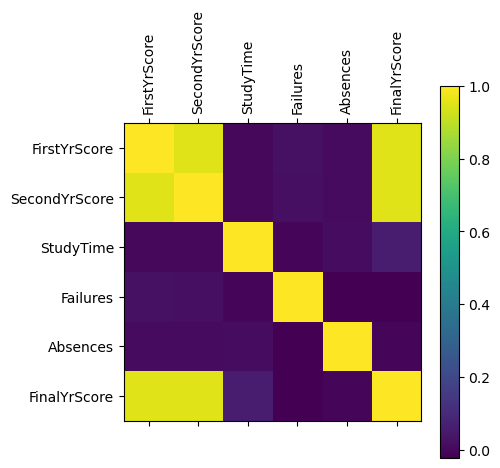

In [30]:
plt.matshow(Corr_mat)
plt.xticks(range(len(Corr_mat)),Corr_mat.columns,rotation = 90)
plt.yticks(range(len(Corr_mat)),Corr_mat.columns)
plt.colorbar()
plt.show()


In [ ]:
Scatter plot

[]

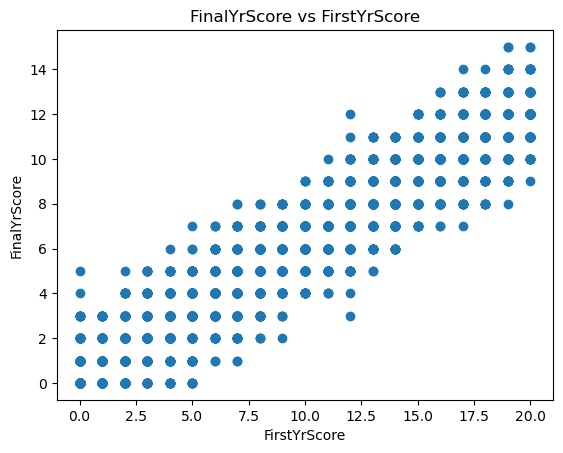

In [31]:
plt.scatter(X_train['FirstYrScore'], y_train)
plt.title("FinalYrScore vs FirstYrScore")
plt.xlabel('FirstYrScore')
plt.ylabel('FinalYrScore')
plt.plot()

[]

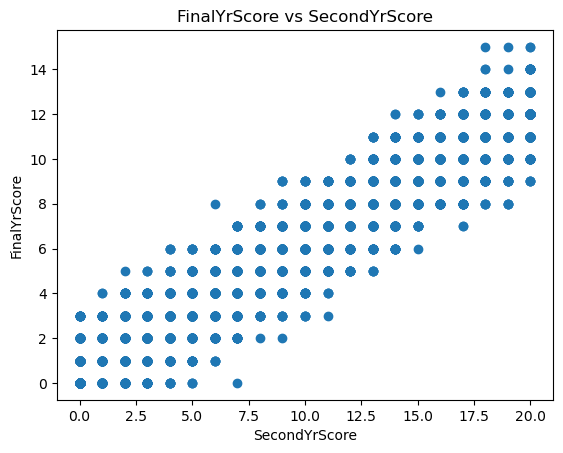

In [32]:

plt.scatter(X_train['SecondYrScore'], y_train)
plt.title("FinalYrScore vs SecondYrScore")
plt.xlabel('SecondYrScore')
plt.ylabel('FinalYrScore')
plt.plot()

[]

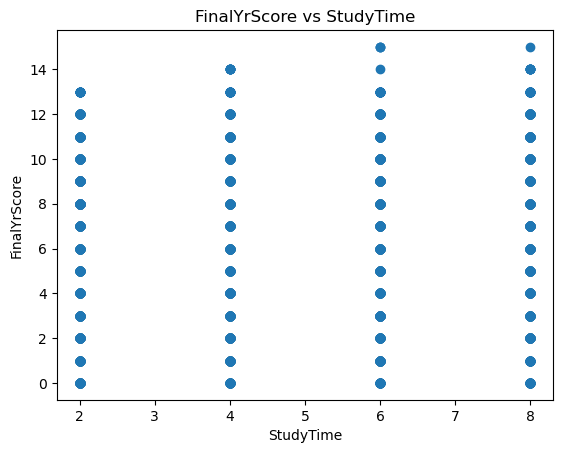

In [33]:
plt.scatter(X_train['StudyTime'], y_train)
plt.title("FinalYrScore vs StudyTime")
plt.xlabel('StudyTime')
plt.ylabel('FinalYrScore')
plt.plot()

[]

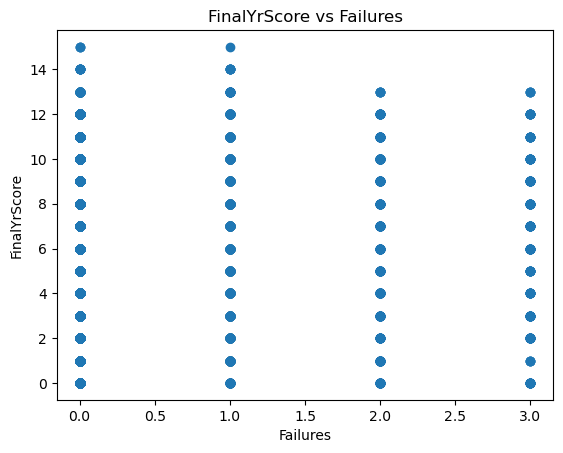

In [34]:
plt.scatter(X_train['Failures'], y_train)
plt.title("FinalYrScore vs Failures")
plt.xlabel('Failures')
plt.ylabel('FinalYrScore')
plt.plot()

[]

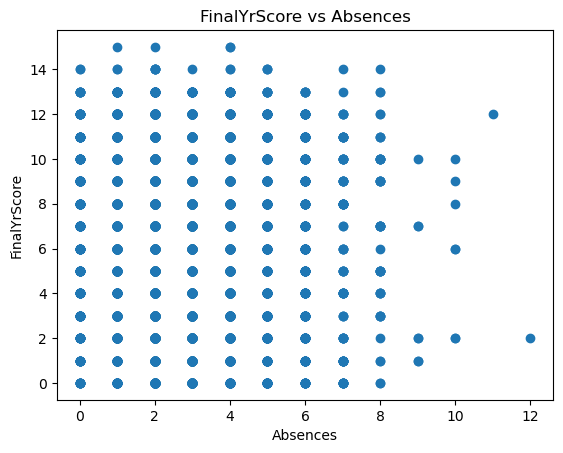

In [35]:
plt.scatter(X_train['Absences'], y_train)
plt.title("FinalYrScore vs Absences")
plt.xlabel('Absences')
plt.ylabel('FinalYrScore')
plt.plot()

**Model building and Training and Testing**

In [36]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)

In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train  = r2_score(y_train, y_pred_train)

print("Evaluation Metrics : Train Data")
print("mean_absolute_error",mae_train)
print("mean_squared_error",mse_train)
print("r2_score",r2_train)

Evaluation Metrics : Train Data
mean_absolute_error 0.8063745930563395
mean_squared_error 1.0246655734082255
r2_score 0.9273240564106494


In [41]:
mse_test = mean_squared_error(Y_test, y_pred)
mae_test = mean_absolute_error(Y_test, y_pred)
r2_test  = r2_score(Y_test, y_pred)

print("Evaluation Metrics : Test Data")
print("mean_absolute_error",mae_test)
print("mean_squared_error",mse_test)
print("r2_score",r2_test)

Evaluation Metrics : Test Data
mean_absolute_error 0.8222527266802804
mean_squared_error 1.0645609100242177
r2_score 0.9242598174311255


In [44]:
print("model coefficient: ", model.coef_)
print("correspoinding features", features.columns.values)

model coefficient:  [ 0.29864498  0.29572015  0.09433396 -0.18011675 -0.04227357]
correspoinding features ['FirstYrScore' 'SecondYrScore' 'StudyTime' 'Failures' 'Absences']


These model coefficients come from a linear regression model trained to predict a student's FinalYrScore based on five input features. Here's what each coefficient means:

📘 Linear Regression Recap
The model equation is:

FinalYrScore = b0 + b1 * FirstYrScore + b2 * SecondYrScore + b3 * StudyTime + b4 * Failures + b5 * Absences
Where:

b0 is the intercept (not shown in your output),*

b1 to b5 are the coefficients for the respective features.

📊 Coefficients Interpretation
Feature	Coefficient Value	Meaning
FirstYrScore	+0.2986	A 1-point increase in first-year score is associated with a +0.30 increase in final-year score, keeping other factors constant.
SecondYrScore	+0.2957	A 1-point increase in second-year score contributes almost the same (+0.30) to the final-year score.
StudyTime	+0.0943	For each extra unit (probably in hours) of study time, the final-year score increases by ~0.09.
Failures	−0.1801	Each past failure decreases the final-year score by ~0.18 points.
Absences	−0.0423	Each absence slightly reduces the final-year score by ~0.042 points.

💡 Summary:
✅ FirstYrScore and SecondYrScore are the strongest positive predictors.

✅ StudyTime helps, but less so.

❌ Failures and Absences negatively impact the score.

This shows that academic performance in earlier years matters most, followed by effort (study time), and penalties come from failing and being absent.
